## Basic Masking
***
Masking is the process of hiding and/or revealing only certain parts of an image. Masking is commonly used in image processing to assist in filtering and/or noise reduction. Masking can also be used to overlay one image on top of another while preserving the original background of the background image. The following example applies a mask to find all circles of a specific color.

In [1]:
# Notebook imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

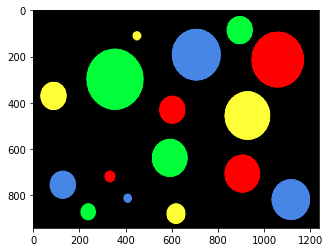

In [2]:
# Reading in the image 
circles = cv2.imread('../Image_Data/Circles.png')

# for display only
rgb_circles = cv2.cvtColor(circles, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_circles)

The original circles image looks like this when converted to rgb. The bgr version will be used throughout the rest of the following code to keep opencv defaults in place.

In [21]:
# Getting the bgr values for the circles
print('green: ', circles[300, 300]) # green
print('yellow: ', circles[350, 100]) # yellow
print('blue: ', circles[750, 100]) # blue
print('red: ', circles[200, 1100]) # red

green:  [ 56 255   0]
yellow:  [ 56 255 255]
blue:  [229 134  72]
red:  [  0   0 255]


References for the bgr values for each of the circle colors.

In [15]:
# method to return image of circles found in desired color range
def find_circles(img, color_range):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mask = cv2.inRange(img, color_range[0], color_range[1])
    return cv2.cvtColor(cv2.bitwise_and(img, img, mask=mask), cv2.COLOR_BGR2RGB)

To successfully filter the image, the bitwise_and() method is used. This method matches only pixels that both the mask and the original image contain, or the conjuction of the two images.

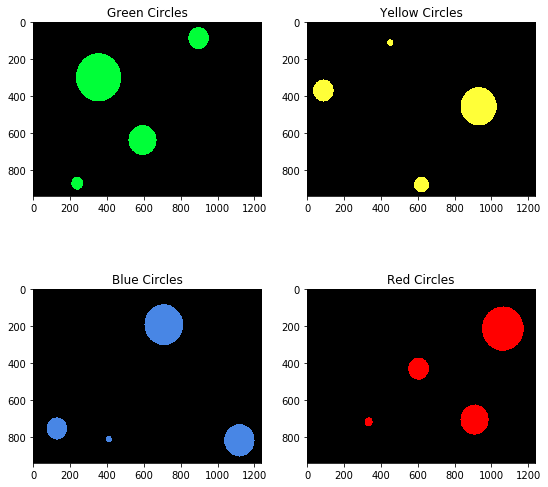

In [16]:
# Lower and upper range bounds for each color
green_range = np.array([[50, 240, 0], [60, 255, 20]], dtype='uint8')
yellow_range = np.array([[40, 240, 240], [60, 255, 255]], dtype='uint8')
blue_range = np.array([[220, 120, 60], [235, 140, 80]], dtype='uint8')
red_range = np.array([[0, 0, 230], [15, 15, 255]], dtype='uint8')

# Getting image results
green_circles = find_circles(circles, green_range)
yellow_circles = find_circles(circles, yellow_range)
blue_circles = find_circles(circles, blue_range)
red_circles = find_circles(circles, red_range)

# Graphing results
fig, axarr = plt.subplots(2, 2, figsize=(9, 9))
axarr[0][0].set_title('Green Circles')
axarr[0][0].imshow(green_circles)
axarr[0][1].set_title('Yellow Circles')
axarr[0][1].imshow(yellow_circles)
axarr[1][0].set_title('Blue Circles')
axarr[1][0].imshow(blue_circles)
axarr[1][1].set_title('Red Circles')
axarr[1][1].imshow(red_circles)

After running the method with the desired color ranges, the mask was able to successfully filter the original image and find all occurences of circles of the desired color.

***
## Masking - Overlaying
A more advanced version of pasting is image overlaying by using masks. This allows only the desired and prominent features of an image to be preserved. These features can then be placed on top of another image while preserving the background of the background image.

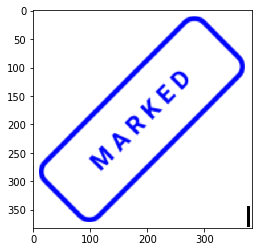

In [26]:
# Loading in the images 
flowers = cv2.cvtColor(cv2.imread('../Image_Data/flowers.jpg'), cv2.COLOR_BGR2RGB)
marked_symbol = cv2.cvtColor(cv2.imread('../Image_Data/Marked_Symbol.png'), cv2.COLOR_BGR2RGB)
plt.imshow(marked_symbol)

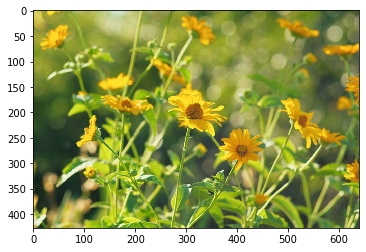

In [6]:
plt.imshow(flowers)

To place the marked symbol on top of the flowers image, a region of interest (roi) should be created. This roi will be the rectangle where the marked symbol will be placed on the original image. The roi should be of the same size and shape as the marked symbol image. To start, the shapes of the two images should be inspected.

In [10]:
marked_symbol.shape

(382, 384, 3)

In [11]:
flowers.shape

(427, 640, 3)

Now that the shapes are known, the roi can be established using the two image shapes. In this example, the marked symbol will be placed in the center of the flowers image. The roi can be created and viewed using the following code:

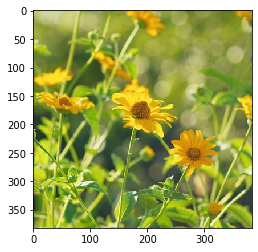

In [16]:
# setting up roi to place symbol at - needs to be the same size as the symbol
x_left = 23
x_right = 427 - 22
y_left = 128
y_right = 640 - 128
roi = flowers[x_left:x_right, y_left:y_right] # same shape as the logo
plt.imshow(roi)

Now that the roi has been created, the mask can be created. The foreground image, the marked symbol in this case, should first be converted to grayscale.

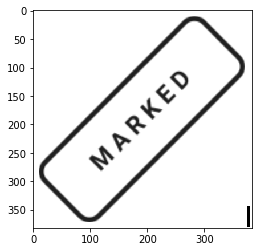

In [17]:
marked_symbol_gray = cv2.cvtColor(marked_symbol, cv2.COLOR_RGB2GRAY)
plt.imshow(marked_symbol_gray, cmap='gray')

There is currently a problem with this gray image. The mask that will be used needs to be an inverted form of this image because we want to preserve the marked text and border. The operations we will be using will preserve elements where the intesity value is not zero. We can invert the grayscale image and created the inverted mask using the bitwise_not operation.

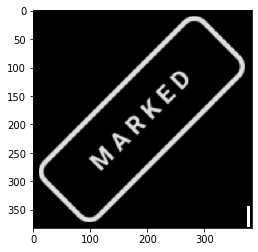

In [27]:
mask_inv = cv2.bitwise_not(marked_symbol_gray)
plt.imshow(mask_inv, cmap='gray')

Now that the mask has been created, we can use the mask to get the desired foreground. Bitwise or takes the disjunction of two input images wherever the mask does not equal 0. This is why the original grayscal image was inverted. The foreground looks as follows:

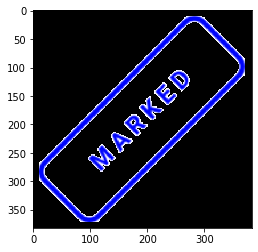

In [28]:
fg = cv2.bitwise_or(marked_symbol, marked_symbol, mask=mask_inv)
plt.imshow(fg)

Bitwise or can also be used to calculate the new region of interest with the watermark overlay.

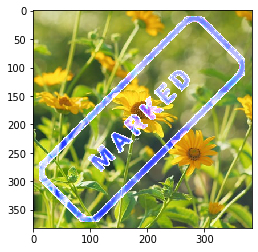

In [29]:
new_roi = cv2.bitwise_or(fg, roi)
plt.imshow(new_roi)

It is finally time to apply the new roi to the larger image. This can be done using the code below.

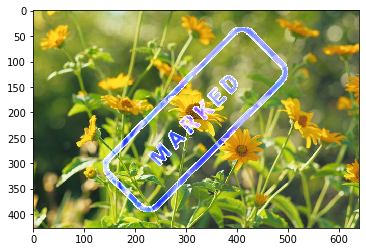

In [30]:
marked_flowers = flowers.copy()
marked_flowers[x_left:x_right, y_left:y_right] = new_roi
plt.imshow(marked_flowers)

The original image now has a watermark at the center, while the original image background is preserved.

***
## References
* opencv bitwise operations example: https://docs.opencv.org/master/d0/d86/tutorial_py_image_arithmetics.html
* filtering pokemon game cartridges example: https://www.pyimagesearch.com/2014/08/04/opencv-python-color-detection/
* opencv docs: https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#inrange

***